In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [ ]:
# Plot misclassified images
import pandas as pd

def plot_misclasified_examples(x, true_lables, predicted_lables, n=5, print_misclassified=False, labels=None):
  misclassified_idx = np.where(predicted_lables != true_lables)[0]
  misclassified_random_idxes = np.random.choice(misclassified_idx, n*n)
  plt.figure(figsize=(15,15))
  for i in range(n*n):
      idx = misclassified_random_idxes[i]
      plt.subplot(n,n,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x[idx], cmap='gray')
      if labels==None:
        plt.xlabel("True  %s, Pred: %s" % (true_lables[idx], predicted_lables[idx]))
      else:
        plt.xlabel("True  %s, Pred: %s" % (labels[true_lables[idx]], labels[predicted_lables[idx]]))
  plt.show()

  if print_misclassified:
      if labels==None:
        print(pd.DataFrame({'idx':misclassified_random_idxes,
                            'true':true_lables[misclassified_random_idxes],
                            'pred':predicted_lables[misclassified_random_idxes]}))
      else:
        print(pd.DataFrame({'idx':misclassified_random_idxes,
                        #'true':labels[true_lables[misclassified_random_idxes]],
                        'true':true_lables[misclassified_random_idxes],
                        #'pred':labels[predicted_lables[misclassified_random_idxes]]}))
                        'pred':predicted_lables[misclassified_random_idxes]}))
        

def plot_examples(x, y, cmap, labels=None):
  plt.figure(figsize=(15,15))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x[i], cmap=cmap)
      if labels==None:
        plt.xlabel(y[i])
      else:
        plt.xlabel(labels[y[i]])
  plt.show()


In [ ]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test)  = cifar.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

K = len(set(y_train))
print("number of classes:", K)

# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

number of classes: 10


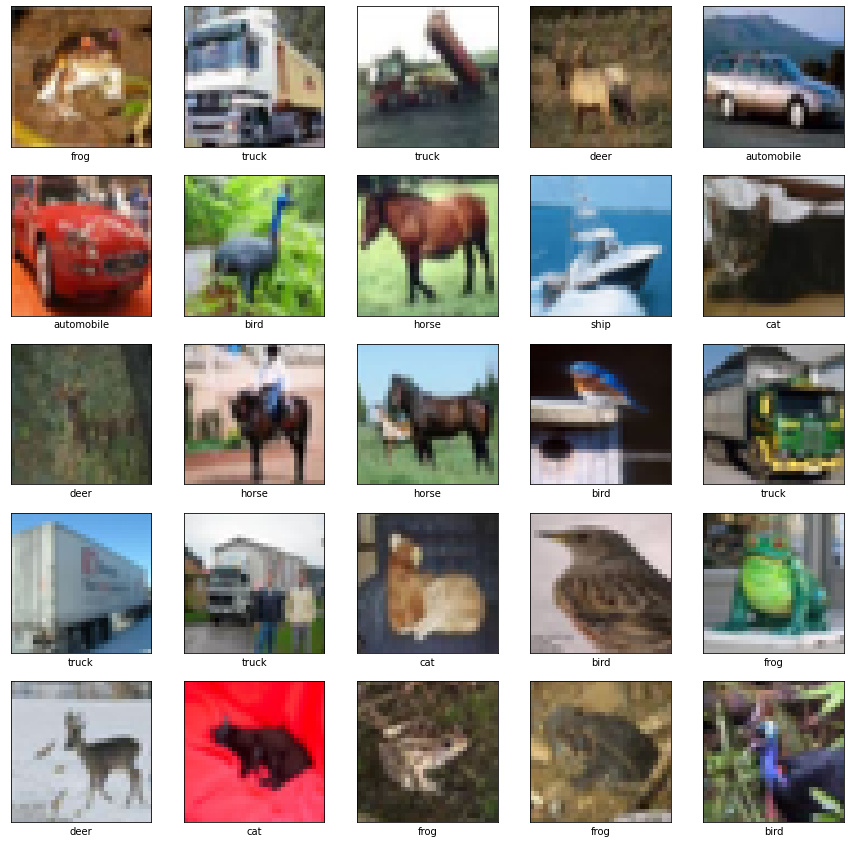

In [ ]:
plot_examples(x_train, y_train, 'gray', labels=labels)

In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, kernel_size=(3,3), strides=2, activation='relu')(i)
x = Conv2D(64, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Conv2D(128, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = tf.keras.models.Model(i,x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4926 - accuracy: 0.4541 - val_loss: 1.2103 - val_accuracy: 0.5691
Epoch 2/15
1563/1563 [==============================] - 49s 32ms/step - loss: 1.1490 - accuracy: 0.5899 - val_loss: 1.0804 - val_accuracy: 0.6170
Epoch 3/15
1563/1563 [==============================] - 49s 32ms/step - loss: 0.9988 - accuracy: 0.6447 - val_loss: 0.9757 - val_accuracy: 0.6516
Epoch 4/15
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8770 - accuracy: 0.6891 - val_loss: 0.9619 - val_accuracy: 0.6621
Epoch 5/15
1563/1563 [==============================] - 49s 32ms/step - loss: 0.7814 - accuracy: 0.7242 - val_loss: 0.8984 - val_accuracy: 0.6919
Epoch 6/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6877 - accuracy: 0.7583 - val_loss: 0.8945 - val_accuracy: 0.6920
Epoch 7/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6110 - accuracy: 0.7827 - val_loss: 0.8849 -

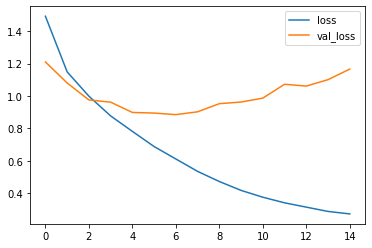

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

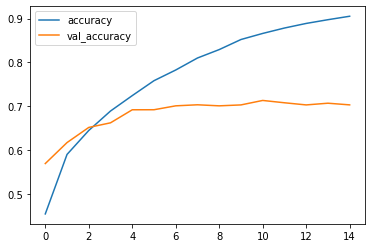

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[769  24  39  26  19  10   8  16  60  29]
 [ 19 828   9   8   4   5  25   5  22  75]
 [ 70   6 518  74 113  88  75  34  14   8]
 [ 18   8  53 514  60 193  88  41  10  15]
 [ 19   4  62  73 671  55  52  55   6   3]
 [ 10   4  32 170  52 636  35  51   3   7]
 [  9   6  19  56  46  37 806   9   7   5]
 [ 13   4  24  41  77  75   5 751   1   9]
 [ 77  34  14  18   8  12   6  10 797  24]
 [ 37  97  10  24   8  12  15  24  32 741]]


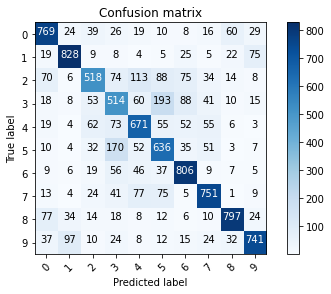

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

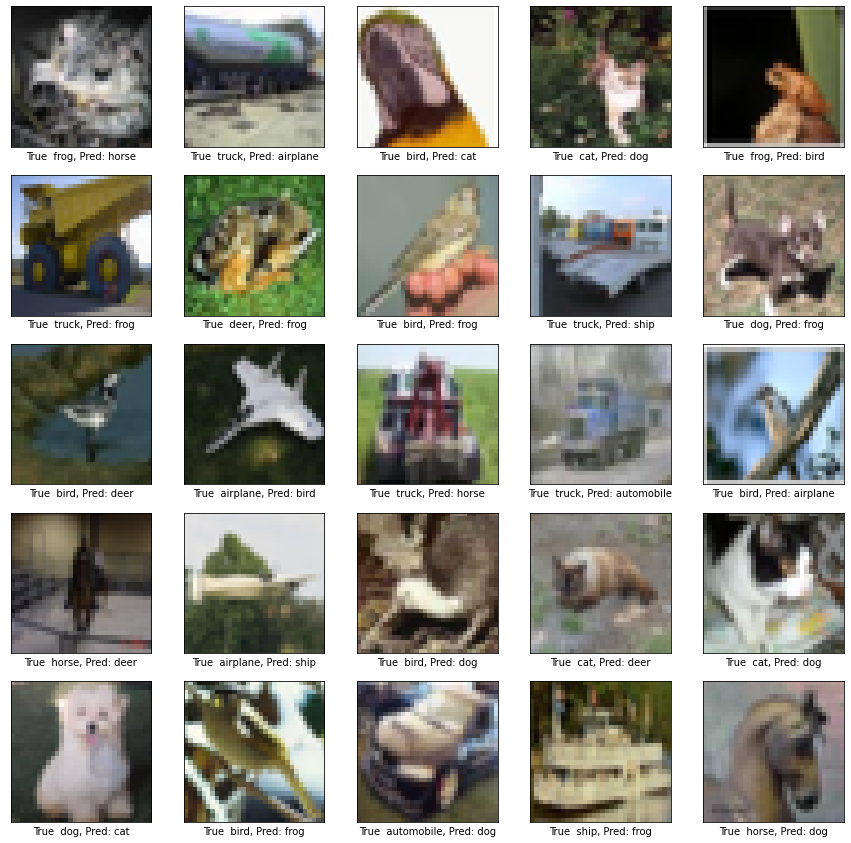

     idx  true  pred
0   5141     6     7
1   2960     9     0
2   1321     2     3
3   4545     3     5
4   4423     6     2
5   9777     9     6
6   2128     4     6
7   5085     2     6
8   6419     9     8
9   8110     5     6
10   674     2     4
11  1596     0     2
12   213     9     7
13   172     9     1
14  1763     2     0
15  6631     7     4
16  6180     0     8
17  3728     2     5
18  8326     3     4
19  5413     3     5
20  9164     5     3
21  3319     2     6
22   325     1     5
23  6429     8     6
24  9346     7     5


array([6, 9, 2, 3, 6, 9, 4, 2, 9, 5, 2, 0, 9, 9, 2, 7, 0, 2, 3, 3, 5, 2,
       1, 8, 7], dtype=uint8)

In [ ]:
plot_misclasified_examples(x_test, y_test, p_test, print_misclassified=True, labels=labels)